# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Importing

In [2]:
filepath1='/content/drive/MyDrive/CodeX Marketing/dim_cities.csv'
filepath2='/content/drive/MyDrive/CodeX Marketing/dim_repondents.csv'
filepath3='/content/drive/MyDrive/CodeX Marketing/fact_survey_responses.csv'

# File Reading

In [3]:
dim_cities=pd.read_csv(filepath1)
dim_respondents=pd.read_csv(filepath2)
fact_responses=pd.read_csv(filepath3)

In [4]:
dim_cities.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [5]:
dim_respondents.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [6]:
fact_responses.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


# Checking Null Values

In [7]:
dim_cities.isnull().sum()

City_ID    0
City       0
Tier       0
dtype: int64

In [8]:
dim_respondents.isnull().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [9]:
fact_responses.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

In [10]:
fact_responses.describe()

,Response_ID,Respondent_ID,Taste_experience
count,10000.00000,10000.00000,10000.000000
mean,108000.50000,125030.50000,3.281900
std,2886.89568,2886.89568,1.239752
min,103001.00000,120031.00000,1.000000
25%,105500.75000,122530.75000,2.000000
50%,108000.50000,125030.50000,3.000000
75%,110500.25000,127530.25000,4.000000
max,113000.00000,130030.00000,5.000000


In [11]:
df1=pd.merge(dim_cities,dim_respondents,how='inner',on='City_ID')
df=pd.merge(df1,fact_responses,how='left',on='Respondent_ID')
df.head()

,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary,103064,2-3 times a month,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Gyms and fitness centers,Sports/exercise
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female,103090,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,Yes,Yes,TV commercials,Other,Yes,50-99,Supermarkets,Social outings/parties
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary,103132,Rarely,Before exercise,...,Healthier alternatives,Vitamins,No,Yes,TV commercials,Compact and portable cans,No,100-150,Local stores,Sports/exercise
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female,103172,2-3 times a week,Before exercise,...,Reduced sugar content,Sugar,No,No,Other,Compact and portable cans,Yes,Above 150,Online retailers,Social outings/parties
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female,103187,Daily,To stay awake during work/study,...,Other,Sugar,No,Yes,TV commercials,Collectible packaging,Yes,Below 50,Online retailers,Social outings/parties


In [12]:
# Number of Respondents in each city
citywise_respondent=df.groupby(['City']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Respondets'}).sort_values(by='Respondets')
citywise_respondent['Respondent Percentage']=citywise_respondent['Respondets']*100/citywise_respondent['Respondets'].sum()
citywise_respondent['Respondent Percentage']=citywise_respondent['Respondent Percentage'].round(0)
ax1=pd.DataFrame(citywise_respondent['Respondent Percentage'])
ax1

,Respondent Percentage
City,
Lucknow,2.0
Jaipur,4.0
Delhi,4.0
Ahmedabad,5.0
Kolkata,6.0
Pune,9.0
Chennai,9.0
Mumbai,15.0
Hyderabad,18.0


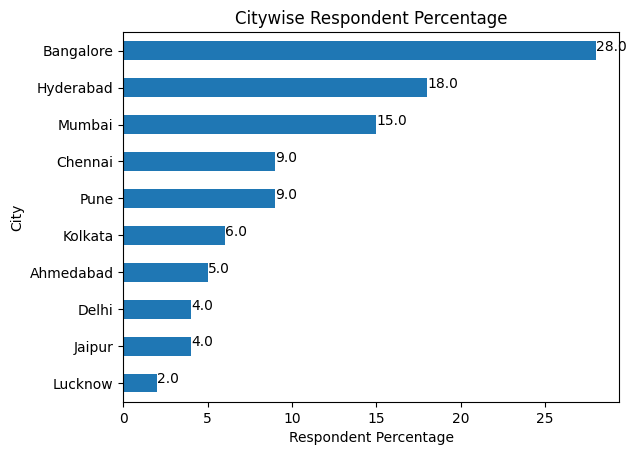

In [13]:
ax=ax1['Respondent Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('City')
plt.title('Citywise Respondent Percentage')
for index, value in enumerate(ax1['Respondent Percentage']):
    ax.text(value, index, str(value))
plt.show()

# Insights
Most of the respondents from TIER 1 cities

<Axes: xlabel='City'>

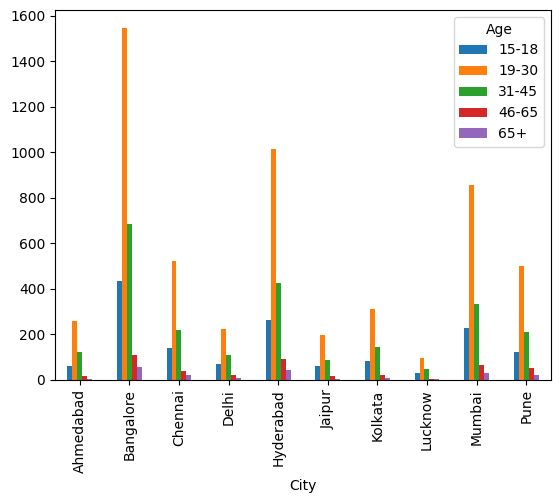

In [14]:
x=df.groupby(['City','Age']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'}).reset_index()
y=x.pivot(index='City',columns='Age',values='Responses')
y.plot(kind='bar')

# Demographic Insights

In [15]:
# a. Who prefers energy drink more?  (male/female/non-binary?)
age_group=pd.DataFrame(df['Gender'].value_counts(normalize=True)*100).rename(columns={'proportion':'Percentage'}).sort_values(by='Percentage')
age_group

,Percentage
Gender,
Non-binary,5.07
Female,34.55
Male,60.38


Text(0, 0.5, '')

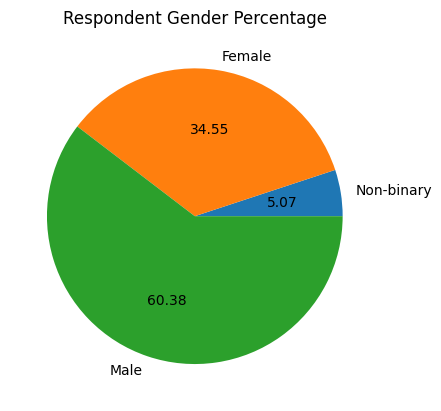

In [16]:
age_group['Percentage'].plot(kind='pie',subplots=True,autopct='%0.2f')
plt.title('Respondent Gender Percentage')
plt.ylabel('')

# So more than half of the the respondents are male. Males are the highest consumers of energy drinks.

In [17]:
# b. Which age group prefers energy drinks more?
age=df.groupby(['Age']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
age['Percentage']=age['Responses']*100/age['Responses'].sum()
age

,Responses,Percentage
Age,,
15-18,1488,14.88
19-30,5520,55.20
31-45,2376,23.76
46-65,426,4.26
65+,190,1.90


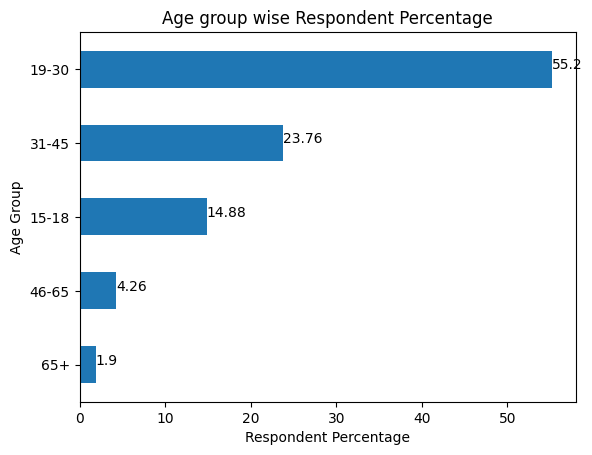

In [18]:
ax1=pd.DataFrame(age['Percentage']).sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Age Group')
plt.title('Age group wise Respondent Percentage')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# 19-30 and 31-45 These two age groups are the top two age groups that consume energy drinks.
#These two group combine 78% of total responses. These age groups belongs to mostly from college students,working professional

In [20]:
# c. Which type of marketing reaches the most Youth (15-30)?
channel=df[(df['Age']=='15-18') | (df['Age']=='19-30')]
marketing_channel=channel.groupby(['Marketing_channels']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
marketing_channel['Percentage']=marketing_channel['Responses']*100/marketing_channel['Responses'].sum()
marketing_channel['Percentage']=marketing_channel['Percentage'].round(2)
marketing_channel

,Responses,Percentage
Marketing_channels,,
Online ads,3373,48.13
Other,702,10.02
Outdoor billboards,702,10.02
Print media,446,6.36
TV commercials,1785,25.47


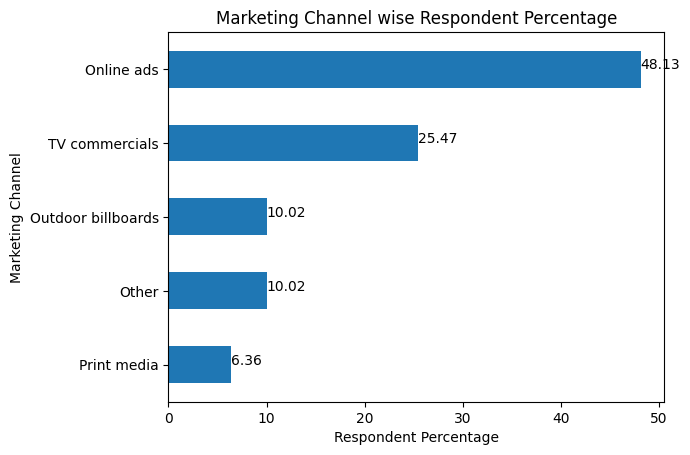

In [21]:
ax1=pd.DataFrame(marketing_channel['Percentage']).sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Marketing Channel')
plt.title('Marketing Channel wise Respondent Percentage')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# As age group between 15-30 are mostly college going students or working professionals.They are mostly active on various social media like Instagram,Facebook,Twitter etc. So Online ads is top marketing channel to attract youths.

# 2. Consumer Preferences

In [22]:
# a. What are the preferred ingredients of energy drinks among respondents?
ingredients=df.groupby(['Ingredients_expected']).agg({'Response_ID':'count'}).rename(columns={'Response_ID':'Responses'})
ingredients['Percentage']=ingredients['Responses']*100/ingredients['Responses'].sum()
ingredients['Percentage']=ingredients['Percentage'].round(2)
ingredients

,Responses,Percentage
Ingredients_expected,,
Caffeine,3896,38.96
Guarana,1553,15.53
Sugar,2017,20.17
Vitamins,2534,25.34


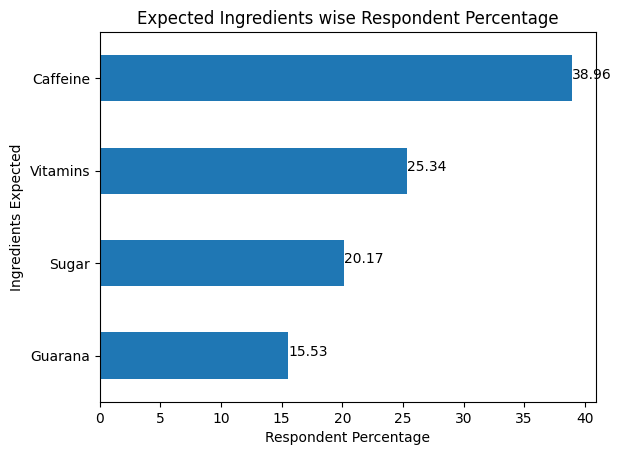

In [23]:
ax1=pd.DataFrame(ingredients['Percentage']).sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Ingredients Expected')
plt.title('Expected Ingredients wise Respondent Percentage')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# Caffeine and Vitamins are most expected ingredients in energy drinks. This implies consumers are health concious and they generally drink energy drink to improve alertness, energy, and concentration.

In [24]:
# b. What packaging preferences do respondents have for energy drinks?
packaging=df.groupby(['Packaging_preference']).agg({'Response_ID':'count'}).rename(columns={'Response_ID':'Responses'})
packaging['Percentage']=packaging['Responses']*100/packaging['Responses'].sum()
packaging['Percentage']=packaging['Percentage'].round(2)
packaging

,Responses,Percentage
Packaging_preference,,
Collectible packaging,1501,15.01
Compact and portable cans,3984,39.84
Eco-friendly design,983,9.83
Innovative bottle design,3047,30.47
Other,485,4.85


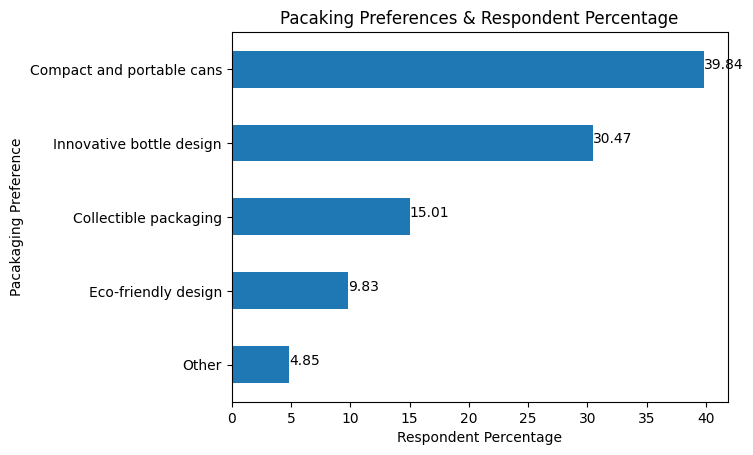

In [25]:
ax1=pd.DataFrame(packaging['Percentage']).sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Pacakaging Preference')
plt.title('Pacaking Preferences & Respondent Percentage')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# From the above bar chart we can see approx 70% of consumers want innovative design with compact and portable cans.

# 3. Competition Analysis:

In [26]:
# a. Who are the current market leaders?
brands=df.groupby(['Current_brands']).agg({'Response_ID':'count'}).rename(columns={'Response_ID':'Response'})
brands['Percentage']=brands['Response']*100/brands['Response'].sum()
brands['Percentage']=brands['Percentage'].round(2)
brands

,Response,Percentage
Current_brands,,
Bepsi,2112,21.12
Blue Bull,1058,10.58
CodeX,980,9.80
Cola-Coka,2538,25.38
Gangster,1854,18.54
Others,479,4.79
Sky 9,979,9.79


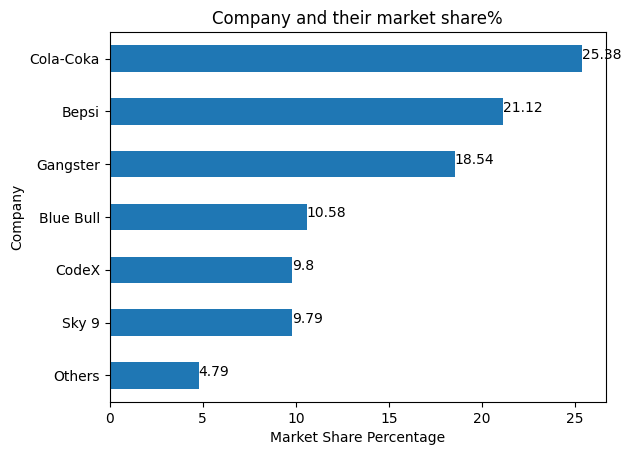

In [27]:
ax1=pd.DataFrame(brands['Percentage']).sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Market Share Percentage')
plt.ylabel('Company')
plt.title('Company and their market share%')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# Current market leader is Cola-Coka. Cola-Coka,Bepsi and Gangster these are top 3 current market leaders. total market share of these three market leaders is 65% . CodeX is in the 5th position in market it has only 9.8% market share.

In [28]:
# b. What are the primary reasons consumers prefer those brands over ours?
brands_df=df.groupby(['Current_brands','Reasons_for_choosing_brands']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'}).reset_index()
brands_df_pivot=brands_df.pivot(index='Current_brands',columns='Reasons_for_choosing_brands',values='Responses')
brands_df_pivot

Reasons_for_choosing_brands,Availability,Brand reputation,Effectiveness,Other,Taste/flavor preference
Current_brands,,,,,
Bepsi,418,577,339,355,423
Blue Bull,180,289,187,165,237
CodeX,195,259,176,168,182
Cola-Coka,510,616,433,448,531
Gangster,339,511,338,309,357
Others,86,140,87,79,87
Sky 9,182,260,188,155,194


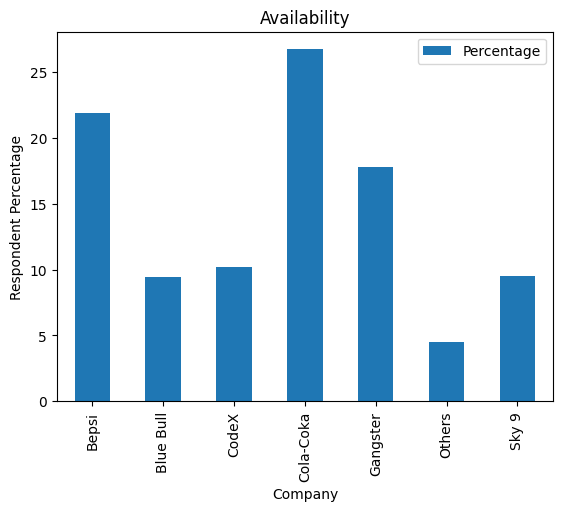

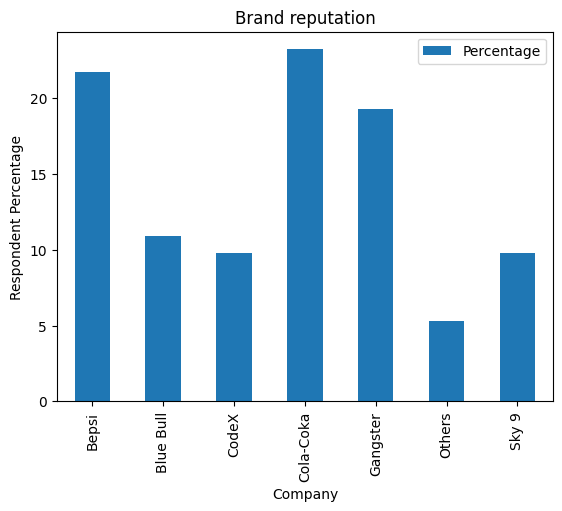

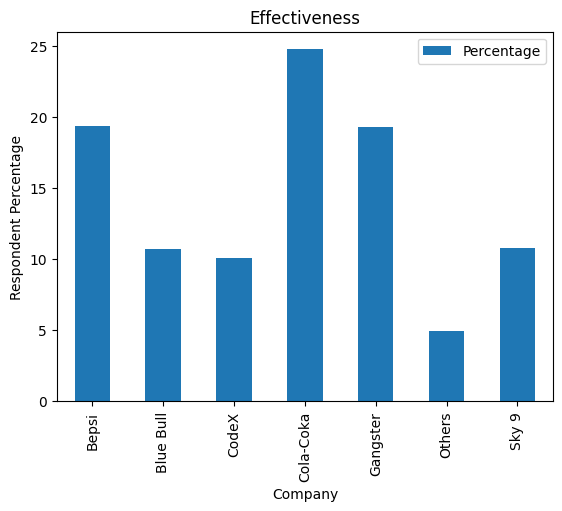

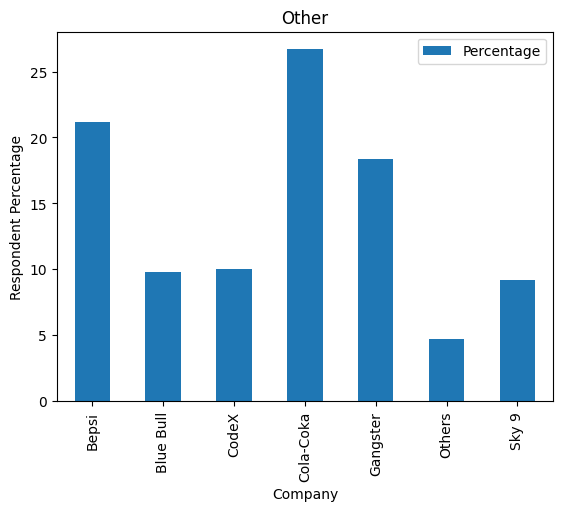

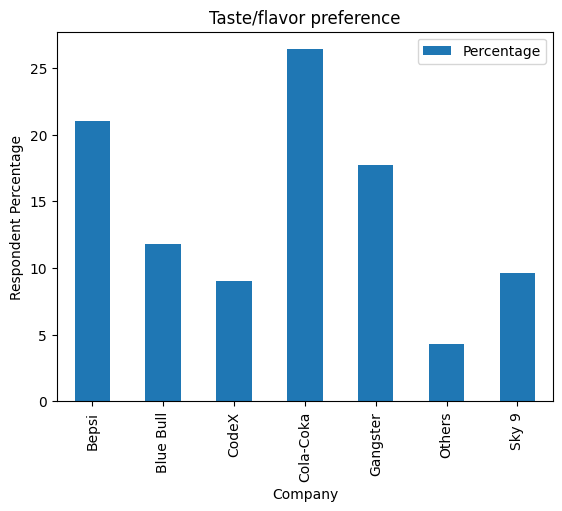

In [29]:
for i in brands_df_pivot.columns:
    i_df=pd.DataFrame(brands_df_pivot[i])
    i_df['Percentage']=i_df[i]*100/i_df[i].sum()
    i_df['Percentage']=i_df['Percentage'].round(2)
    pd.DataFrame(i_df['Percentage']).plot(kind='bar')
    plt.xlabel('Company')
    plt.ylabel('Respondent Percentage')
    plt.title(i)

# 4. Marketing Channels and Brand Awareness

In [30]:
# a. Which marketing channel can be used to reach more customers?
marketing=df.groupby(['Marketing_channels']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
marketing['Percentage']=marketing['Responses']*100/marketing['Responses'].sum()
marketing['Percentage']=marketing['Percentage'].round(2)
marketing

,Responses,Percentage
Marketing_channels,,
Online ads,4020,40.20
Other,1225,12.25
Outdoor billboards,1226,12.26
Print media,841,8.41
TV commercials,2688,26.88


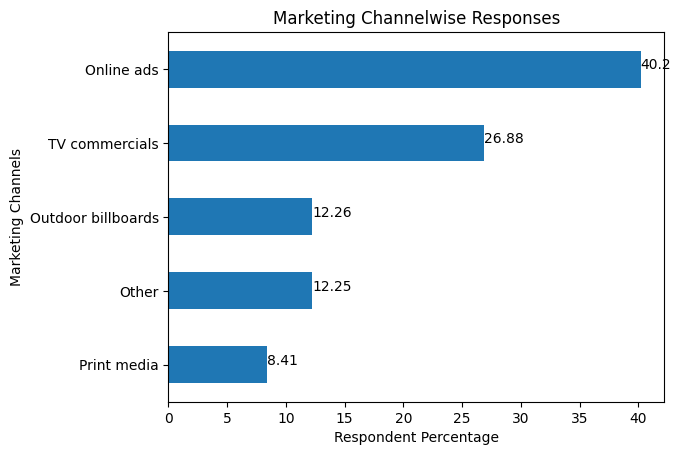

In [31]:
ax1=pd.DataFrame(marketing['Percentage'])
ax1=ax1.sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Marketing Channels')
plt.title('Marketing Channelwise Responses')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# In the internet era, most of the people has internet access through smartphones. They spend their time in various social media platforms like Instagram, Facebook, Twitter etc.So if we run ads in various social media and in TV that will result maximum reach to customers

In [32]:
# b. How effective are different marketing strategies and channels in reaching our customers?
codex_df=df[df['Current_brands']=='CodeX'].groupby(['Marketing_channels']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
codex_df['Percentage']=codex_df['Responses']*100/codex_df['Responses'].sum()
codex_df['Percentage']=codex_df['Percentage'].round(2)
codex_df

,Responses,Percentage
Marketing_channels,,
Online ads,411,41.94
Other,116,11.84
Outdoor billboards,119,12.14
Print media,73,7.45
TV commercials,261,26.63


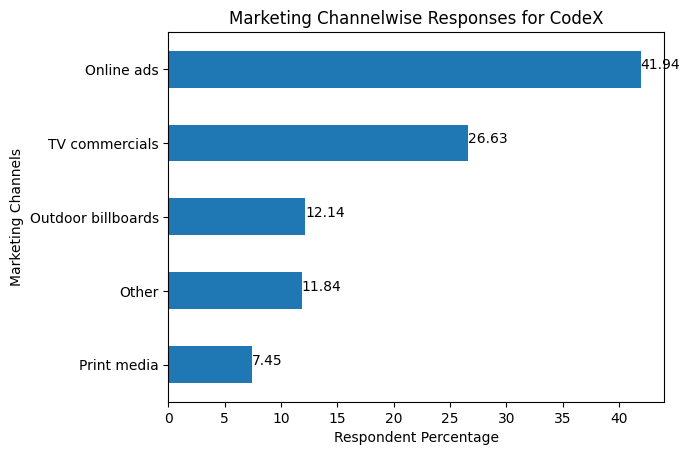

In [33]:
ax1=pd.DataFrame(codex_df['Percentage'])
ax1=ax1.sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Marketing Channels')
plt.title('Marketing Channelwise Responses for CodeX')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# Same trend follows for CodeX also. Online Ads & TV Commertials combinely these two marketing channels reaches 68.67% of total respondents

# 5. Brand Penetration

In [59]:
# a. What do people think about our brand? (overall rating)
brand_df=df.groupby(['Brand_perception']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
brand_df

,Responses
Brand_perception,
Negative,1769
Neutral,5974
Positive,2257


Text(0, 0.5, '')

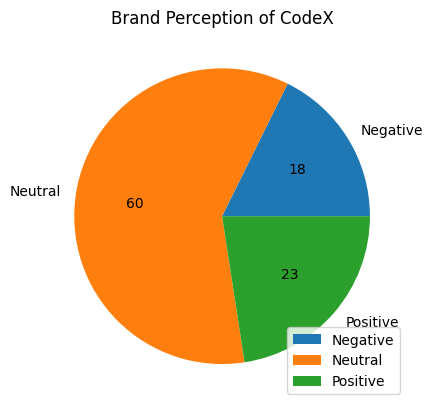

In [61]:
brand_df.plot(kind='pie',subplots=True,autopct='%0.0f')
plt.title('Brand Perception of CodeX')
plt.ylabel('')

# Brand perception for CodeX is Neutral. 60% of consumers thinks neutral abaout CodeX. That is a good sign but my making some chages we can convert this from neutral to positive side.

In [36]:
# b. Which cities do we need to focus more on?
brand_city=df[df['Current_brands']=='CodeX'].groupby(['City','Brand_perception']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'}).reset_index()
brand_city_pivot=brand_city.pivot(index='Brand_perception',columns='City',values='Responses')
brand_city_pivot

City,Ahmedabad,Bangalore,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Lucknow,Mumbai,Pune
Brand_perception,,,,,,,,,,
Negative,19,42,13,8,29,5,6,2,23,25
Neutral,19,186,59,20,113,13,35,2,91,51
Positive,7,64,20,12,40,10,7,1,42,16


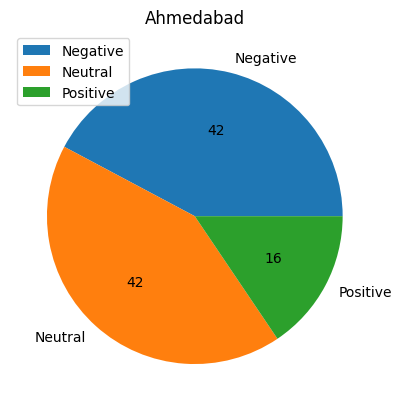

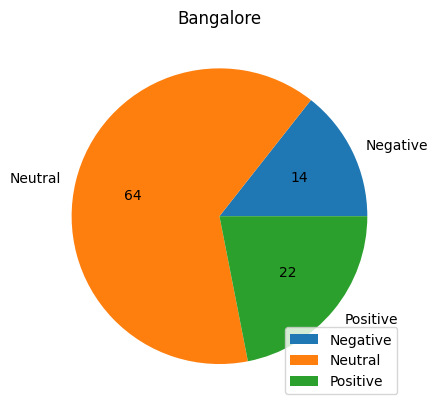

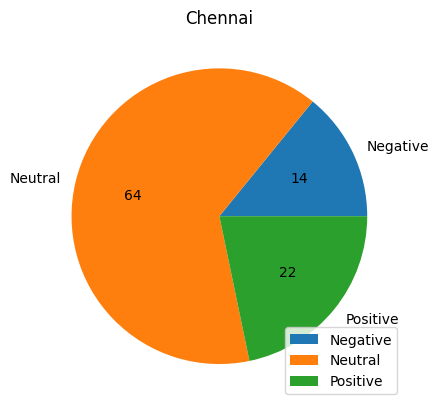

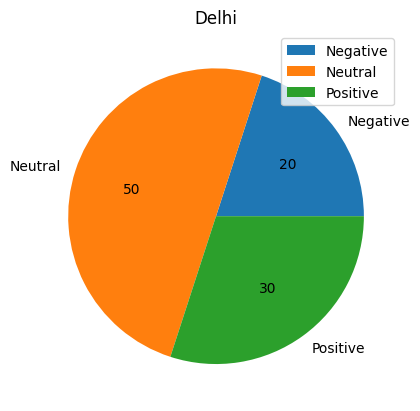

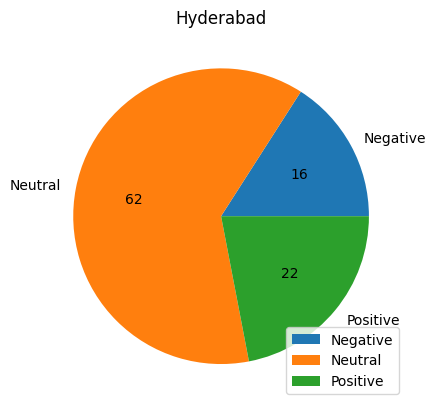

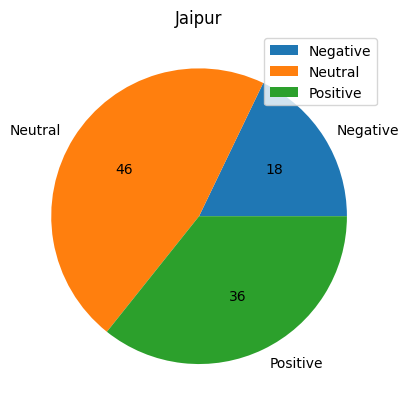

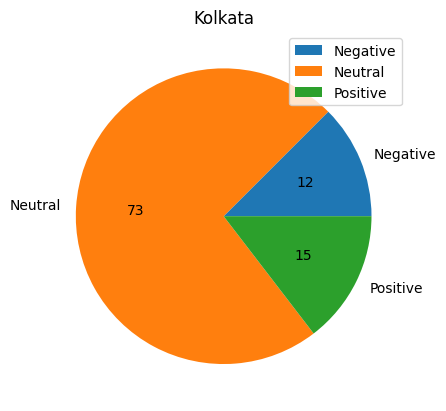

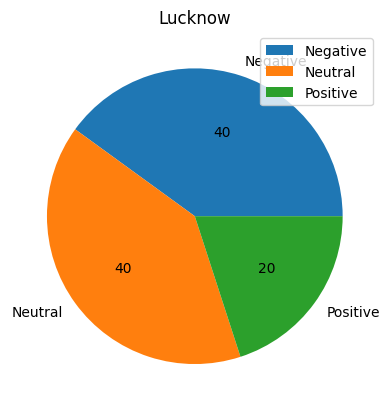

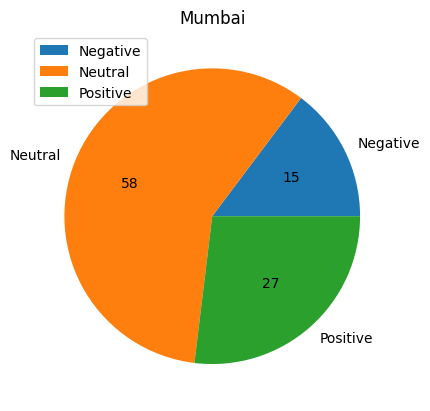

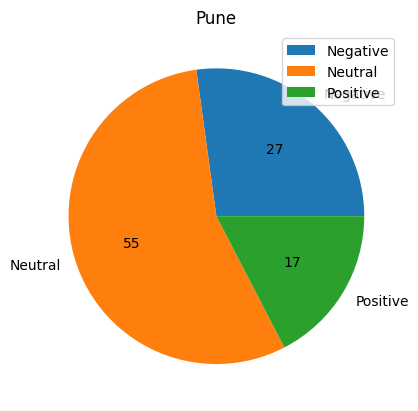

In [37]:
for i in brand_city_pivot.columns:
  pd.DataFrame(brand_city_pivot[i]).plot(kind='pie',subplots=True,autopct='%0.0f')
  plt.ylabel('')
  plt.title(i)

# From the above pie charts we can see in Ahmedabad and Lucknow negative brand perception is quite high as compated to other ciies. So for Ahmedabad and Lucknow we need to focus more.

# 6. Purchase Behavior

In [38]:
# a. Where do respondents prefer to purchase energy drinks?
purchase_df=df.groupby(['Purchase_location']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
purchase_df['Percentage']=purchase_df['Responses']*100/purchase_df['Responses'].sum()
purchase_df

,Responses,Percentage
Purchase_location,,
Gyms and fitness centers,1464,14.64
Local stores,813,8.13
Online retailers,2550,25.50
Other,679,6.79
Supermarkets,4494,44.94


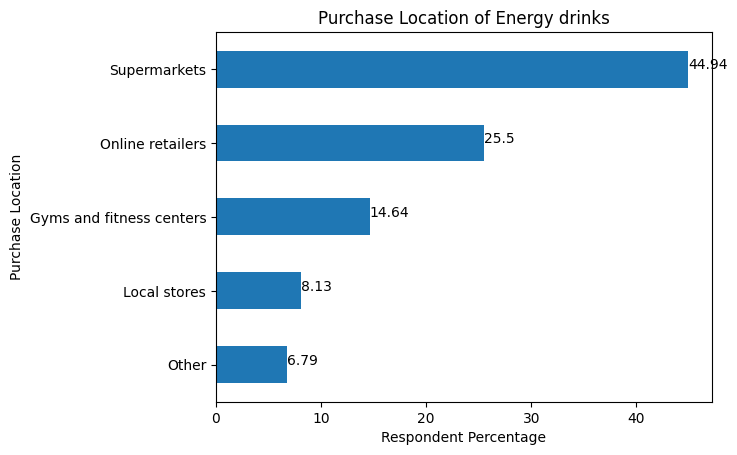

In [39]:
ax1=pd.DataFrame(purchase_df['Percentage'])
ax1=ax1.sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Purchase Location')
plt.title('Purchase Location of Energy drinks')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# From the above bar chart we can see consumers generally buy from supermarkets and from online retailers.

In [40]:
# b. What are the typical consumption situations for energy drinks among respondents?
cunsumption_df=df.groupby(['Typical_consumption_situations']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
cunsumption_df['Percentage']=cunsumption_df['Responses']*100/cunsumption_df['Responses'].sum()
cunsumption_df

,Responses,Percentage
Typical_consumption_situations,,
Driving/commuting,297,2.97
Other,491,4.91
Social outings/parties,1487,14.87
Sports/exercise,4494,44.94
Studying/working late,3231,32.31


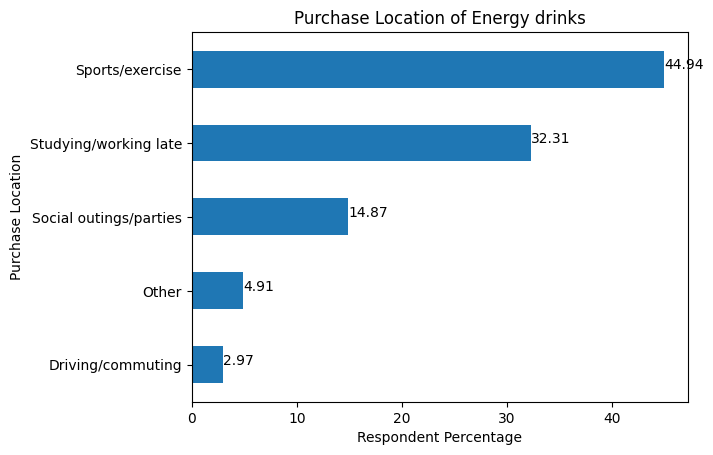

In [41]:
ax1=pd.DataFrame(cunsumption_df['Percentage'])
ax1=ax1.sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Purchase Location')
plt.title('Purchase Location of Energy drinks')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# Energy drinks generally used for improve focus. so people generally consume energy drinks during exercise/sports & Studying/working late. If we start selling our energy drinks at gyms or sports center then there is high chance of increase in sales

In [42]:
# c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?
limited_edition_df=df.groupby(['Limited_edition_packaging']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
limited_edition_df

,Responses
Limited_edition_packaging,
No,4023
Not Sure,2031
Yes,3946


Text(0.5, 1.0, 'Limited Edition Response Percentage')

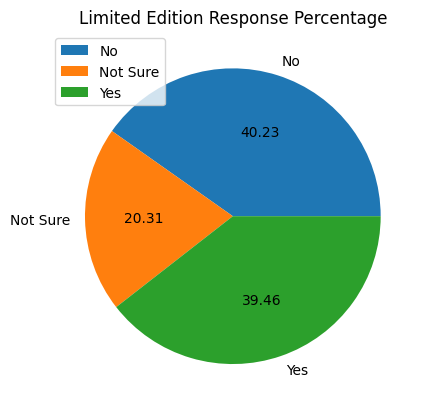

In [43]:
limited_edition_df.plot(kind='pie',subplots=True,autopct='%0.2f')
plt.ylabel('')
plt.title('Limited Edition Response Percentage')

In [44]:
price_df=df.groupby(['Price_range']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
price_df['Percentage']=price_df['Responses']*100/price_df['Responses'].sum()
price_df

,Responses,Percentage
Price_range,,
100-150,3142,31.42
50-99,4288,42.88
Above 150,1561,15.61
Below 50,1009,10.09


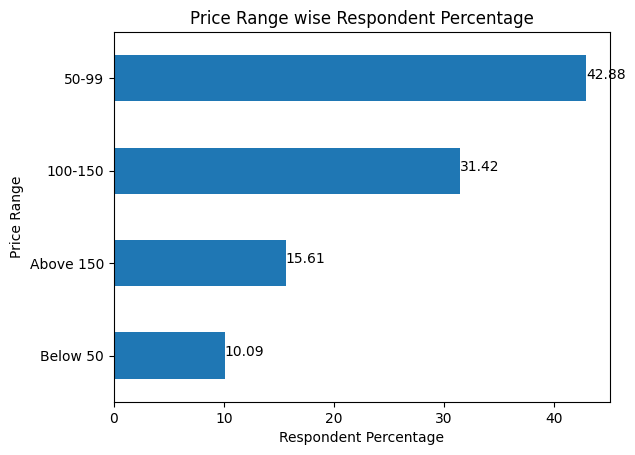

In [45]:
ax1=pd.DataFrame(price_df['Percentage'])
ax1=ax1.sort_values(by='Percentage')
ax=ax1['Percentage'].plot(kind='barh')
plt.xlabel('Respondent Percentage')
plt.ylabel('Price Range')
plt.title('Price Range wise Respondent Percentage')
for index, value in enumerate(ax1['Percentage']):
    ax.text(value, index, str(value))
plt.show()

# 7. Product Development

In [46]:
brand_df=df.groupby(['Current_brands','Brand_perception']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
brand_df_x=brand_df.reset_index()
brand_df_x['Sum_Responses'] = brand_df_x.groupby('Current_brands')['Responses'].transform('sum')
brand_df_x['Percentage']=brand_df_x['Responses']*100/brand_df_x['Sum_Responses']
brand_df_x['Percentage']=brand_df_x['Percentage'].round(0)
brand_df_x

,Current_brands,Brand_perception,Responses,Sum_Responses,Percentage
0,Bepsi,Negative,391,2112,19.0
1,Bepsi,Neutral,1281,2112,61.0
2,Bepsi,Positive,440,2112,21.0
3,Blue Bull,Negative,204,1058,19.0
4,Blue Bull,Neutral,587,1058,55.0
5,Blue Bull,Positive,267,1058,25.0
6,CodeX,Negative,172,980,18.0
7,CodeX,Neutral,589,980,60.0
8,CodeX,Positive,219,980,22.0
9,Cola-Coka,Negative,429,2538,17.0


In [47]:
brand_df_x_pivot=brand_df_x.pivot(index='Current_brands',columns='Brand_perception',values='Percentage')
brand_df_x_pivot

Brand_perception,Negative,Neutral,Positive
Current_brands,,,
Bepsi,19.0,61.0,21.0
Blue Bull,19.0,55.0,25.0
CodeX,18.0,60.0,22.0
Cola-Coka,17.0,60.0,23.0
Gangster,17.0,59.0,24.0
Others,16.0,61.0,23.0
Sky 9,18.0,60.0,22.0


Text(0.5, 1.0, 'Brand Perception of Companies')

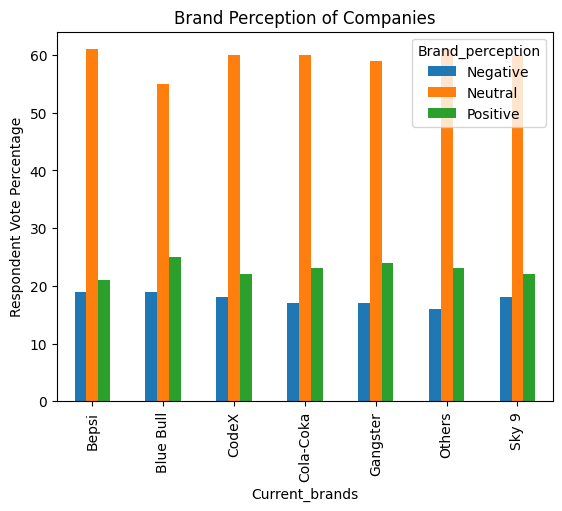

In [48]:
brand_df_x_pivot.plot(kind='bar')
plt.ylabel('Respondent Vote Percentage')
plt.title('Brand Perception of Companies')

#Almost every brand has same type of brand perception amoung respondents. Approximately 60% of votes for each brand is neutral. So brandwise CodeX is okay

In [49]:
taste_df=df.groupby(['Current_brands','Taste_experience']).agg({'Respondent_ID':'nunique'}).rename(columns={'Respondent_ID':'Responses'})
taste_df_x=taste_df.reset_index()
taste_df_x['Sum_Responses'] = taste_df_x.groupby('Current_brands')['Responses'].transform('sum')
taste_df_x['Percentage']=taste_df_x['Responses']*100/taste_df_x['Sum_Responses']
taste_df_x['Percentage']=taste_df_x['Percentage'].round(0)
taste_df_x

,Current_brands,Taste_experience,Responses,Sum_Responses,Percentage
0,Bepsi,1,217,2112,10.0
1,Bepsi,2,351,2112,17.0
2,Bepsi,3,602,2112,29.0
3,Bepsi,4,517,2112,24.0
4,Bepsi,5,425,2112,20.0
5,Blue Bull,1,104,1058,10.0
6,Blue Bull,2,163,1058,15.0
7,Blue Bull,3,319,1058,30.0
8,Blue Bull,4,258,1058,24.0
9,Blue Bull,5,214,1058,20.0


In [50]:
taste_df_x_pivot=taste_df_x.pivot(index='Current_brands',columns='Taste_experience',values='Percentage')
taste_df_x_pivot

Taste_experience,1,2,3,4,5
Current_brands,,,,,
Bepsi,10.0,17.0,29.0,24.0,20.0
Blue Bull,10.0,15.0,30.0,24.0,20.0
CodeX,11.0,15.0,29.0,25.0,19.0
Cola-Coka,11.0,14.0,30.0,25.0,20.0
Gangster,12.0,14.0,30.0,24.0,19.0
Others,9.0,14.0,33.0,24.0,20.0
Sky 9,9.0,17.0,28.0,26.0,19.0


Text(0.5, 1.0, 'Taste Experience of Companies')

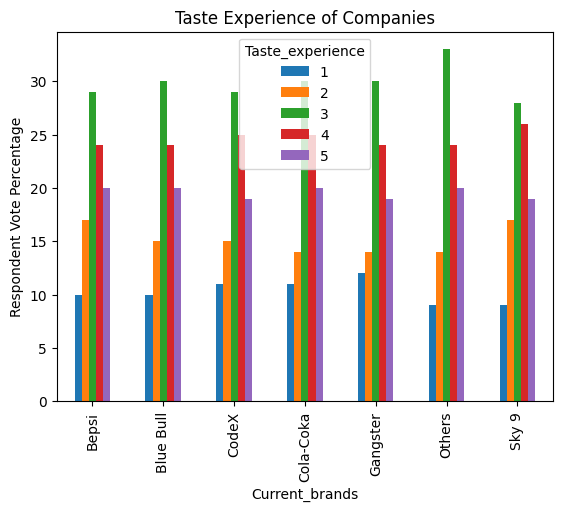

In [51]:
taste_df_x_pivot.plot(kind='bar')
plt.ylabel('Respondent Vote Percentage')
plt.title('Taste Experience of Companies')

# Taste experience for most of the brands quite similar. Aproximately 30% of votes of each brand rates 3 for taste.

In [52]:
frequency_df=df.groupby(['Age','Consume_frequency']).agg({'Response_ID':'nunique'}).rename(columns={'Response_ID':'Responses'})
frequency_df_x=frequency_df.reset_index()
frequency_df_x['Sum_Responses'] = frequency_df_x.groupby('Age')['Responses'].transform('sum')
frequency_df_x['Percentage']=frequency_df_x['Responses']*100/frequency_df_x['Sum_Responses']
frequency_df_x['Percentage']=frequency_df_x['Percentage'].round(0)
frequency_df_xy=frequency_df_x.pivot(index='Age',columns='Consume_frequency',values='Percentage')
frequency_df_xy

Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
Age,,,,,
15-18,16.0,36.0,13.0,16.0,19.0
19-30,16.0,35.0,13.0,16.0,20.0
31-45,17.0,34.0,15.0,15.0,19.0
46-65,15.0,36.0,10.0,20.0,18.0
65+,14.0,37.0,13.0,16.0,21.0


Text(0.5, 1.0, 'Consume Frequency of various Age Groups')

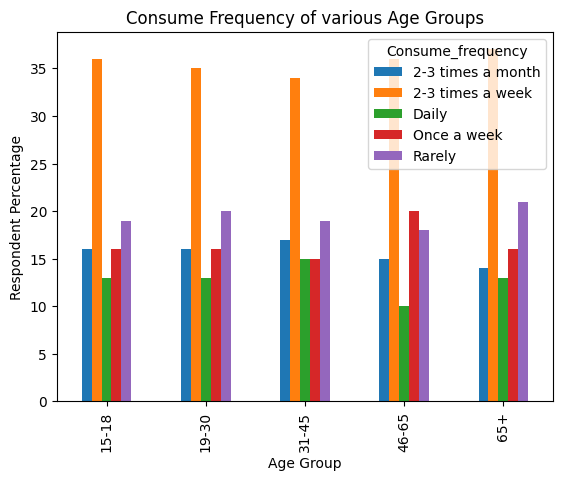

In [53]:
frequency_df_xy.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Respondent Percentage')
plt.title('Consume Frequency of various Age Groups')

# Recommendations

In [54]:
# What immediate improvements can we bring to the product?
improvement_df=df.groupby(['Current_brands','Improvements_desired']).agg({'Response_ID':'nunique'}).rename(columns={'Response_ID':'Responses'}).reset_index()
improvement_df['Sum_Responses'] = improvement_df.groupby('Current_brands')['Responses'].transform('sum')
improvement_df['Percentage']=improvement_df['Responses']*100/improvement_df['Sum_Responses']
improvement_df['Percentage']=improvement_df['Percentage'].round(0)
improvement_df_x=improvement_df.pivot(index='Improvements_desired',columns='Current_brands',values='Percentage')
improvement_df_x

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Improvements_desired,,,,,,,
Healthier alternatives,14.0,15.0,15.0,16.0,15.0,13.0,15.0
More natural ingredients,25.0,26.0,24.0,25.0,25.0,27.0,23.0
Other,10.0,10.0,10.0,10.0,10.0,10.0,9.0
Reduced sugar content,30.0,28.0,30.0,29.0,30.0,29.0,33.0
Wider range of flavors,21.0,21.0,21.0,20.0,19.0,21.0,20.0


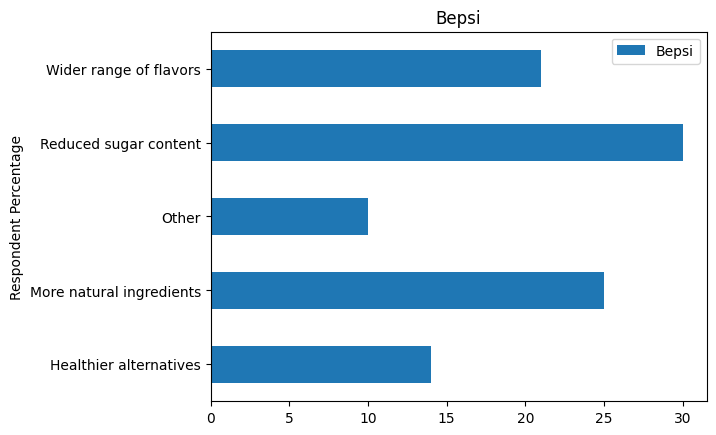

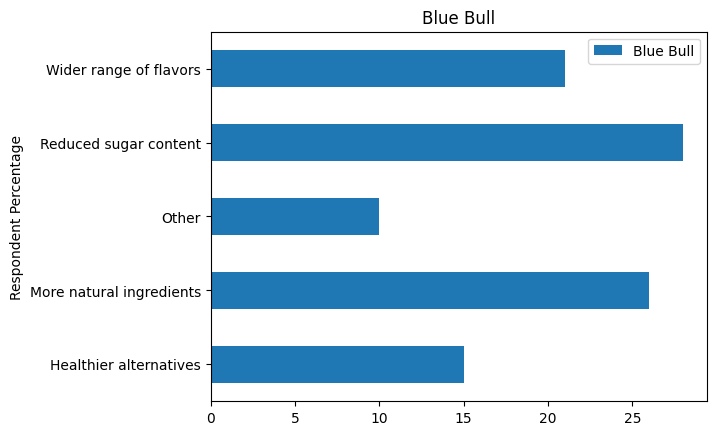

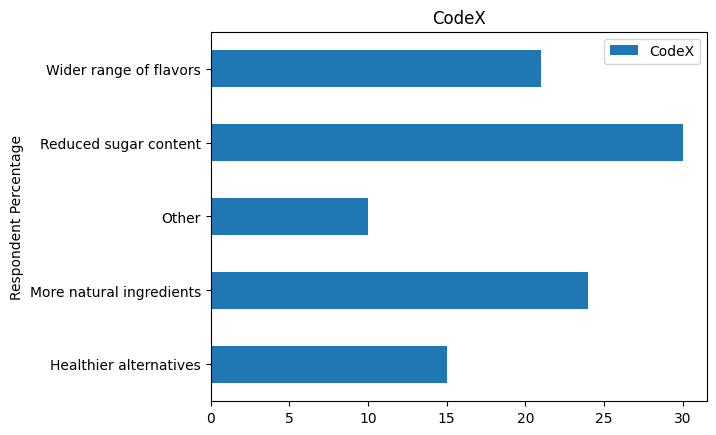

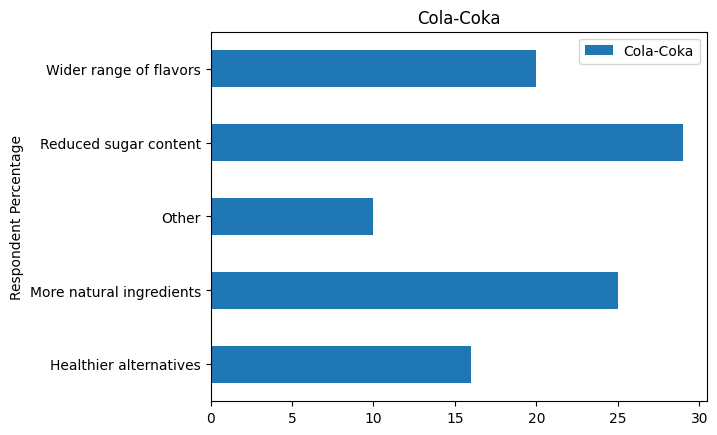

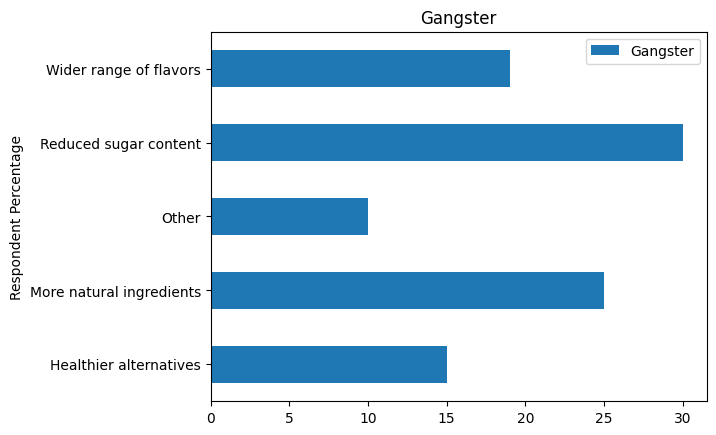

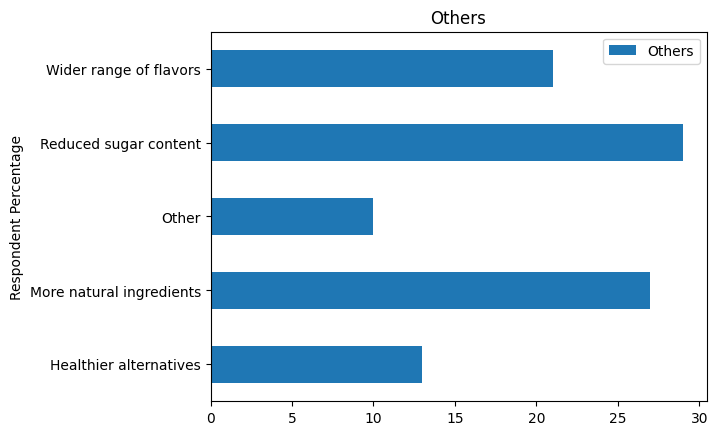

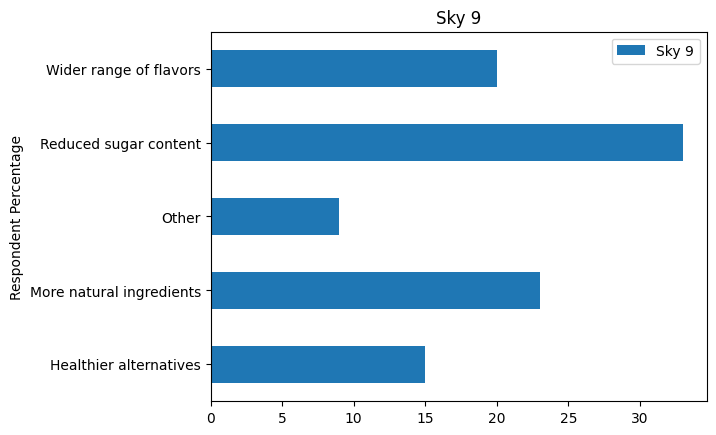

In [55]:
for i in improvement_df_x.columns:
    pd.DataFrame(improvement_df_x[i]).plot(kind='barh')
    plt.ylabel('Respondent Percentage')
    plt.title(i)

#Most of the consumers want to reduce sugar content & more natural ingredients like caffeine,Guarana.We can also introduce new flavours like Strawberry,lemonade,blueberry,pomegranete,citrus,raspberry,lime etc.



In [56]:
# What should be the ideal price of our product?
price_range_df=df.groupby(['Current_brands','Price_range']).agg({'Response_ID':'nunique'}).rename(columns={'Response_ID':'Responses'}).reset_index()
price_range_df['Sum_Responses'] = price_range_df.groupby('Current_brands')['Responses'].transform('sum')
price_range_df['Percentage']=price_range_df['Responses']*100/price_range_df['Sum_Responses']
price_range_df['Percentage']=price_range_df['Percentage'].round(0)
price_range_df_x=price_range_df.pivot(index='Price_range',columns='Current_brands',values='Percentage')
price_range_df_x

Current_brands,Bepsi,Blue Bull,CodeX,Cola-Coka,Gangster,Others,Sky 9
Price_range,,,,,,,
100-150,32.0,33.0,32.0,30.0,32.0,31.0,28.0
50-99,44.0,40.0,42.0,45.0,41.0,43.0,45.0
Above 150,15.0,17.0,16.0,15.0,16.0,16.0,17.0
Below 50,10.0,10.0,10.0,10.0,11.0,10.0,10.0


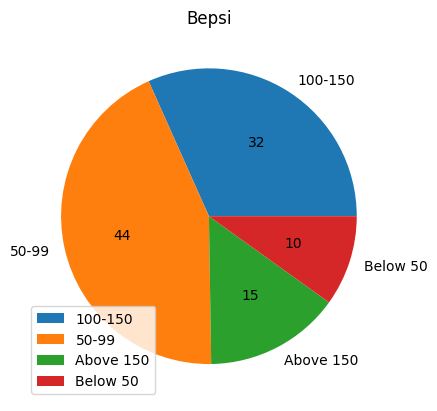

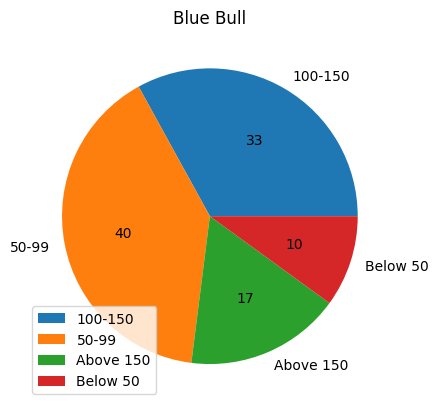

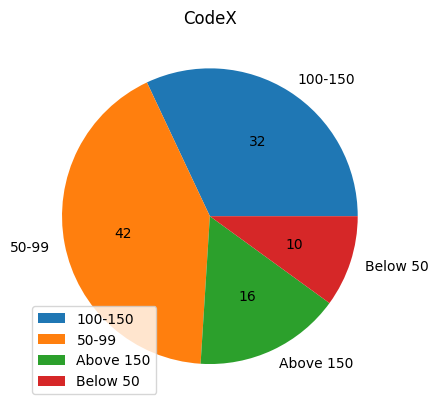

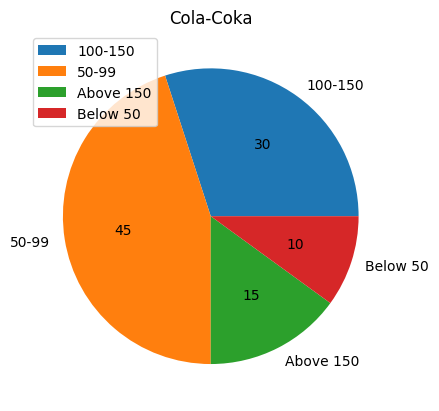

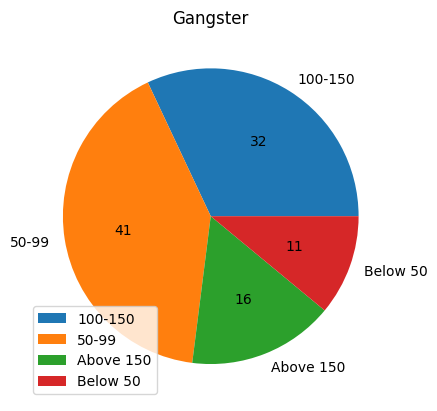

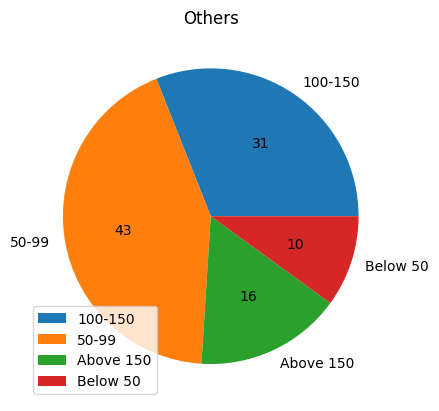

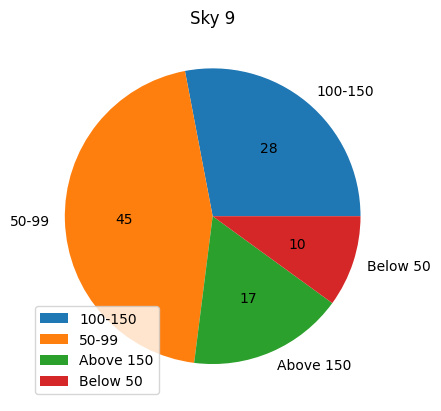

In [57]:
for i in price_range_df_x.columns:
    pd.DataFrame(price_range_df_x[i]).plot(kind='pie',subplots=True,autopct='%0.0f')
    plt.ylabel('')
    plt.title(i)

#Most of the respondents want a price between 50-99. As CodeX is an emerging brand so we should set a price a little less as compared to other brands. I think 80 would be the best price for 250 ml most of energy drink prices for the same quantity are more than 90

Text(0.5, 1.0, 'Do you heard before about Codex?')

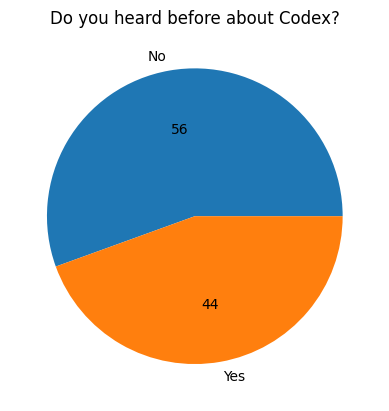

In [58]:
# What kind of marketing campaigns, offers, and discounts we can run?
df['Heard_before'].value_counts().plot(kind='pie',subplots=True,autopct='%0.0f')
plt.ylabel('')
plt.title('Do you heard before about Codex?')

#From the above pie chart we can see 56% of respondents does not know about CodeX.As most of customers from age group of 19-30 and 31-45. These two age groups are college going students or working professionals and the are very much active in various scoical media like Instagram, Facebook, Twitter. So it we could run ads in social medias. we also saw that most of consumers consume energy drinks 2-3 times in a week. So we can offer loyalty programs with discounts or freebies for frequent purchases.

# Who can be a brand ambassador, and why?
As most of our respondets are from age group 19-30 and 31-45 and they generally consume energy drinks for sports/exercise activities and studying. So if we choose a person who is youth icon and associated with any sports/exercise acitivity. So i will choose **Virat Kohli** for brand ambassador of CodeX.

# Who should be our target audience, and why?
From the analysis, can can conclude that most of the energy drink consumers are between age groups of 19-30 and 31-45 and they generally consume these products during exercise/sports activity and studying/working late. So we can target these consumers. We can open stalls near to gym or sports garden or near college to increase our sales.


